In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# create k-armed bandit
def k_abd(k=10):
    means = np.random.normal(0, 1, k)
    return means

k = 10
bandit_means = k_abd(k)


In [ ]:
# greedy with non-optimistic initial values
def greedy_non_optimistic(k, steps, bandit_means):
    q_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    optimal_action = np.argmax(bandit_means)

    for step in range(steps):
        action = np.argmax(q_values)
        reward = np.random.normal(bandit_means[action], 1)
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        rewards[step] = reward

        if action == optimal_action:
            optimal_action_counts[step] = 1

    return rewards, optimal_action_counts


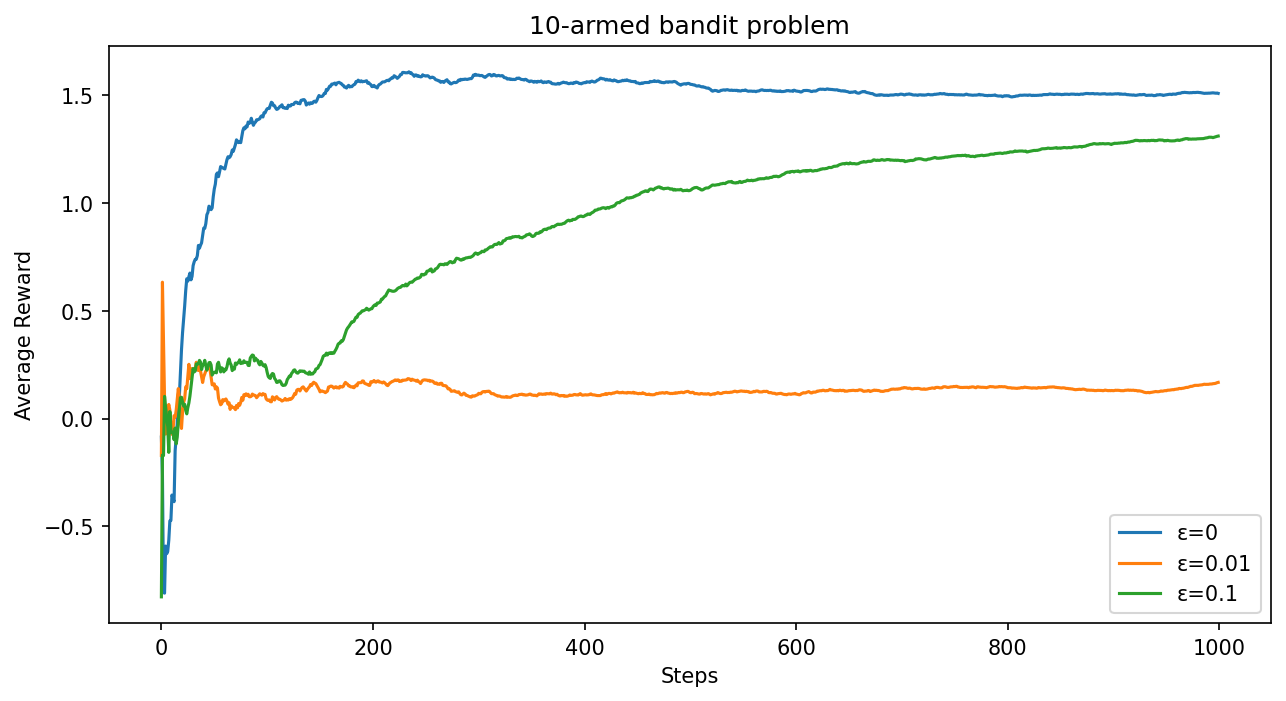

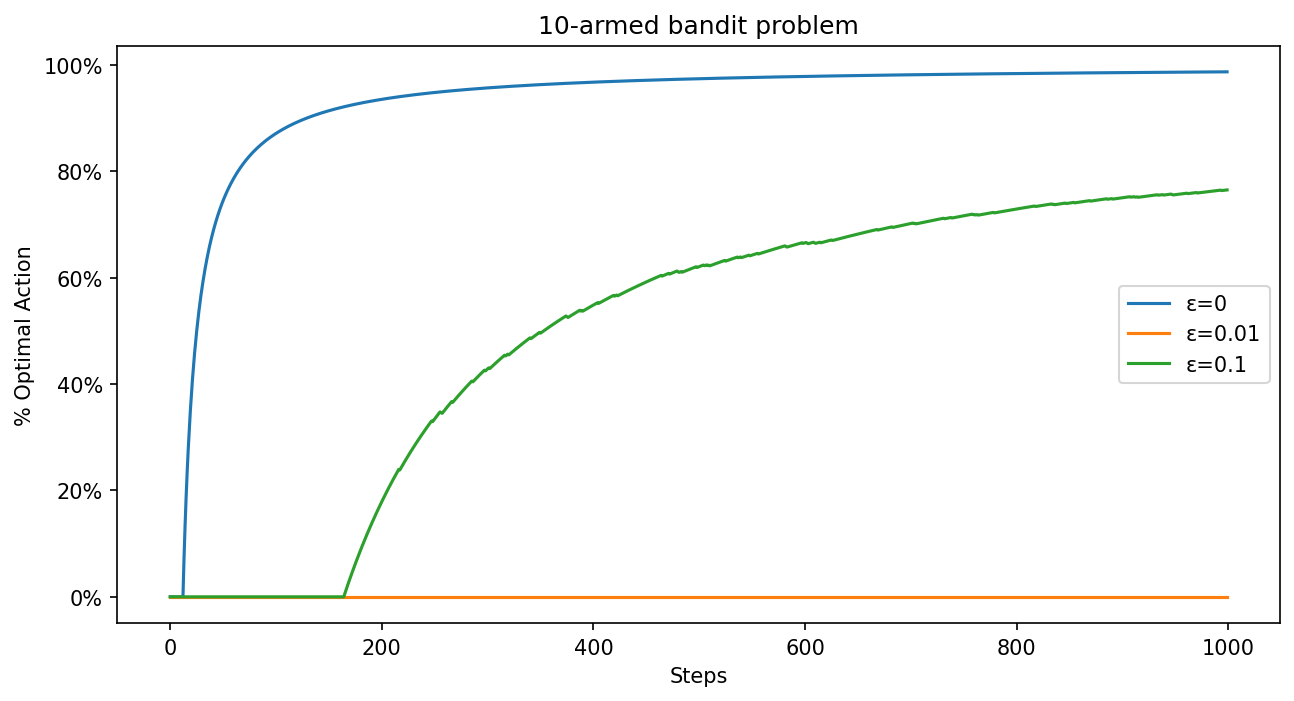

In [ ]:
# epsilon-greedy with different choices of epsilon
def epsilon_greedy(epsilon, means):
    k = len(means)
    reward = []
    total_reward = 0
    optimal_action_percentage = []
    action_counts = np.zeros(k) # number of times each bandit was chosen
    q_values = np.zeros(k) # estimated value
    optimal_action = 0
    optimal_index = np.argmax(means)  # calculate optimal index once
    for i in range(1000):

        if np.random.rand() < epsilon:
            action = np.random.randint(k)
        else:
            action = np.argmax(q_values)
        if action == optimal_index:
            optimal_action += 1
        R = np.random.normal(means[action], 1)
        action_counts[action] += 1
        q_values[action] += (R - q_values[action]) / action_counts[action]
        total_reward += R
        reward.append(total_reward/(i+1))
        optimal_action_percentage.append(optimal_action/(i+1))
    return reward, optimal_action_percentage

k = 10
armed_bandit_10 = k_abd(k)
r1, qap1 = epsilon_greedy(0, armed_bandit_10)
r2, qap2 = epsilon_greedy(0.01, armed_bandit_10)
r3, qap3 = epsilon_greedy(0.1, armed_bandit_10)

# plot
plt.figure(figsize=(10,5),dpi = 150)
plt.plot(r1, label = 'ε=0')
plt.plot(r2, label = 'ε=0.01')
plt.plot(r3, label = 'ε=0.1')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('10-armed bandit problem')
plt.show()

plt.figure(figsize = (10,5), dpi = 150)
plt.plot(qap1,label = 'ε=0')
plt.plot(qap2,label = 'ε=0.01')
plt.plot(qap3,label = 'ε=0.1')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('10-armed bandit problem')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()


The chart above shows that the average rewards after 1000 explorations for ϵ values of 0, 0.01, and 0.1. It is evident that the greedy strategy (ϵ = 0.01) results in the lowest average reward. When ϵ = 0, the average reward is higher compared to when ϵ = 0.1. This can be explained by the fact that in theory, the ϵ-greedy strategy eventually finds the optimal action. Once the optimal action is found, the probability of selecting it when ϵ = 0.1 is approximately p = 1 − ϵ ≈ 0.9, whereas for ϵ = 0, the probability is about p ≈ 1. Consequently, the average reward is higher when ϵ = 0.

In [ ]:
# optimistic starting values with a greedy approach
def optimistic_greedy(k, steps, bandit_means, initial_value):
    q_values = np.full(k, initial_value)
    action_counts = np.zeros(k)
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    optimal_action = np.argmax(bandit_means)

    for step in range(steps):
        action = np.argmax(q_values)
        reward = np.random.normal(bandit_means[action], 1)
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        rewards[step] = reward

        if action == optimal_action:
            optimal_action_counts[step] = 1

    return rewards, optimal_action_counts


In [ ]:
# gradient bandit algorithm
def gradient_bandit(k, steps, bandit_means, alpha):
    preferences = np.zeros(k)
    rewards = np.zeros(steps)
    action_counts = np.zeros(k)
    optimal_action_counts = np.zeros(steps)

    optimal_action = np.argmax(bandit_means)

    for step in range(steps):
        exp_preferences = np.exp(preferences)
        action_probs = exp_preferences / np.sum(exp_preferences)
        action = np.random.choice(k, p=action_probs)
        reward = np.random.normal(bandit_means[action], 1)
        action_counts[action] += 1
        rewards[step] = reward

        if action == optimal_action:
            optimal_action_counts[step] = 1

        for i in range(k):
            if i == action:
                preferences[i] += alpha * (reward - rewards[:step+1].mean()) * (1 - action_probs[i])
            else:
                preferences[i] -= alpha * (reward - rewards[:step+1].mean()) * action_probs[i]

    return rewards, optimal_action_counts


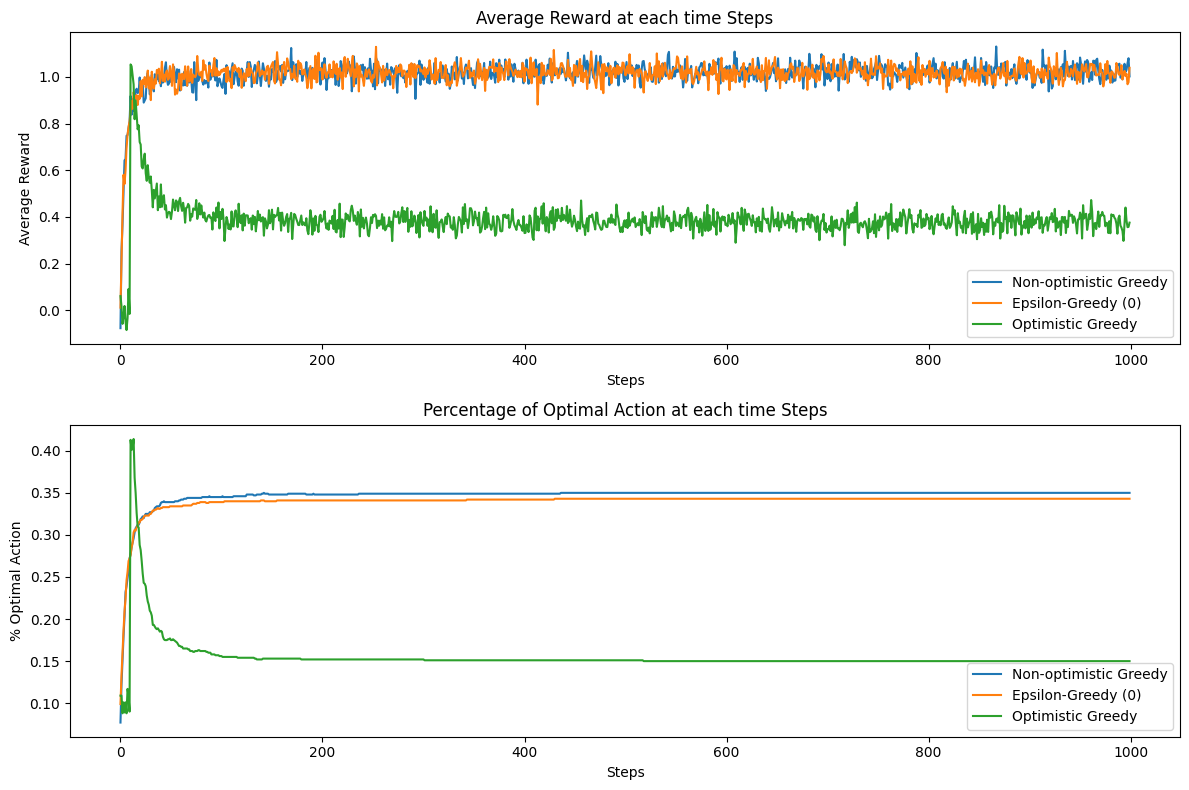

In [ ]:
def run_experiments(k, steps, num_experiments, algo_func, **kwargs):
    all_rewards = np.zeros((num_experiments, steps))
    optimal_action_counts = np.zeros((num_experiments, steps))

    for experiment in range(num_experiments):
        bandit_means = k_abd(k)
        rewards, optimal_actions = algo_func(k, steps, bandit_means, **kwargs)
        all_rewards[experiment] = rewards
        optimal_action_counts[experiment] = optimal_actions

    average_rewards = all_rewards.mean(axis=0)
    optimal_action_percent =  optimal_action_counts.mean(axis=0)

    return average_rewards, optimal_action_percent

steps = 1000
num_experiments = 1000
k = 10

# Run experiments for each algorithm
avg_rewards_greedy, opt_action_percent_greedy = run_experiments(k, steps, num_experiments, greedy_non_optimistic)
avg_rewards_epsilon, opt_action_percent_epsilon = run_experiments(k, steps, num_experiments, epsilon_greedy, epsilon = 0)
avg_rewards_optimistic, opt_action_percent_optimistic = run_experiments(k, steps, num_experiments, optimistic_greedy, initial_value = 5)

# Plotting the results
plt.figure(figsize = (12, 8))

# Average Reward Plot
plt.subplot(2, 1, 1)
plt.plot(avg_rewards_greedy, label = 'Non-optimistic Greedy')
plt.plot(avg_rewards_epsilon, label = 'Epsilon-Greedy (0)')
plt.plot(avg_rewards_optimistic, label = 'Optimistic Greedy')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Average Reward at each time Steps')

# Optimal Action Percentage Plot
plt.subplot(2, 1, 2)
plt.plot(opt_action_percent_greedy, label = 'Non-optimistic Greedy')
plt.plot(opt_action_percent_epsilon, label = 'Epsilon-Greedy (0)')
plt.plot(opt_action_percent_optimistic, label = 'Optimistic Greedy')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.legend()
plt.title('Percentage of Optimal Action at each time Steps')

plt.tight_layout()
plt.show()




The chart above shows that the average rewards after 1000 explorations for greedy with non-optimistic initial values and epsilon-greedy with ϵ = 0 have better performance than optimistic starting values with a greedy approach. Furthermore, from the second chart of the percentage of time the optimal action at each step we can see that greedy with non-optimistic initial values have slightly better performance than epsilon-greedy with ϵ = 0. Therefore, greedy with non-optimistic initial values has the best performance.

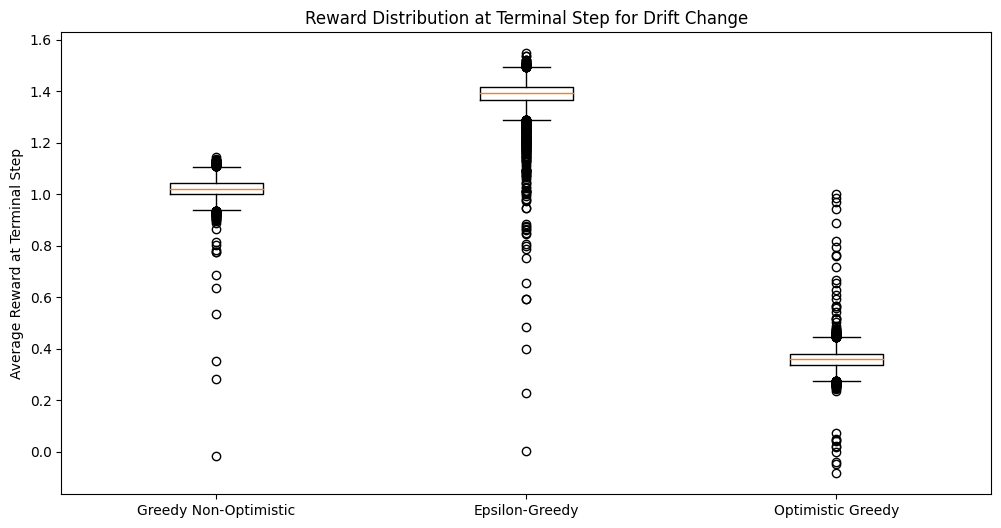

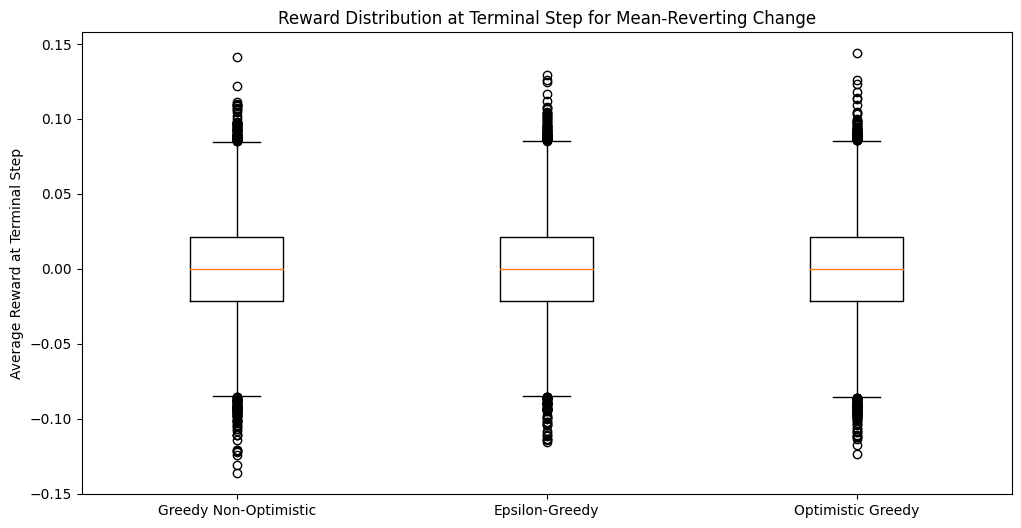

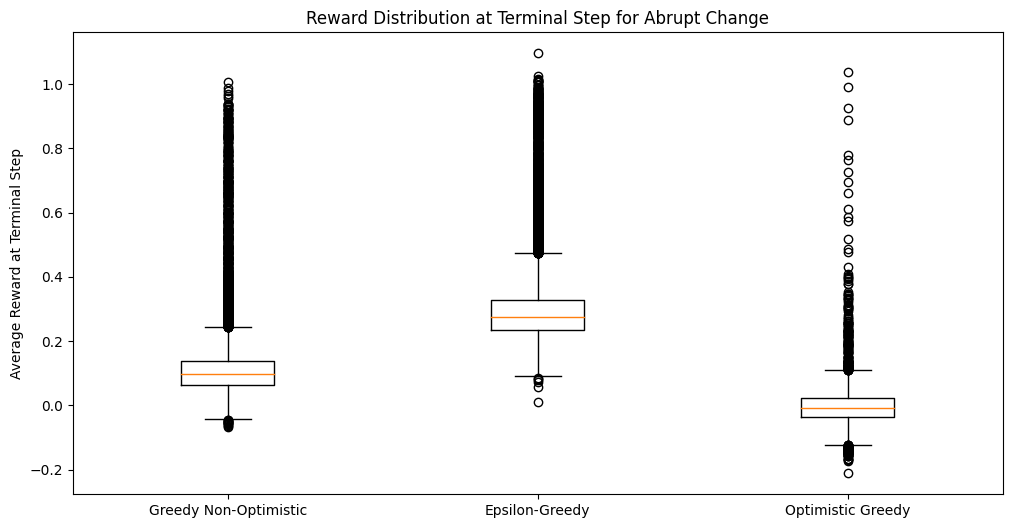

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Create k-armed bandit
def k_abd(k = 10):
    means = np.random.normal(0, 1, k)
    return means

# Drift change
def apply_drift_change(means):
    drift = np.random.normal(0, 0.001, len(means))
    return means + drift

# Mean-reverting change
def apply_mean_reverting_change(means):
    mean_reversion = 0.5 * means + np.random.normal(0, 0.01, len(means))
    return mean_reversion

# Abrupt change
def apply_abrupt_change(means):
    if np.random.rand() < 0.005:
        means = np.random.permutation(means)
    return means

# Greedy with non-optimistic initial values
def greedy_non_optimistic(k, steps, bandit_means, drift=False, mean_reverting=False, abrupt=False):
    q_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    optimal_action = np.argmax(bandit_means)

    for step in range(steps):
        action = np.argmax(q_values)
        reward = np.random.normal(bandit_means[action], 1)
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        rewards[step] = reward

        if action == optimal_action:
            optimal_action_counts[step] = 1

        # Apply changes
        if drift:
            bandit_means = apply_drift_change(bandit_means)
        if mean_reverting:
            bandit_means = apply_mean_reverting_change(bandit_means)
        if abrupt:
            bandit_means = apply_abrupt_change(bandit_means)

        optimal_action = np.argmax(bandit_means)

    return rewards, optimal_action_counts

# Epsilon-greedy with different choices of epsilon
def epsilon_greedy(k, steps, bandit_means, epsilon, drift=False, mean_reverting=False, abrupt=False):
    q_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    optimal_action = np.argmax(bandit_means)

    for step in range(steps):
        if np.random.rand() < epsilon:
            action = np.random.randint(k)
        else:
            action = np.argmax(q_values)

        reward = np.random.normal(bandit_means[action], 1)
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        rewards[step] = reward

        if action == optimal_action:
            optimal_action_counts[step] = 1

        # Apply changes
        if drift:
            bandit_means = apply_drift_change(bandit_means)
        if mean_reverting:
            bandit_means = apply_mean_reverting_change(bandit_means)
        if abrupt:
            bandit_means = apply_abrupt_change(bandit_means)

        optimal_action = np.argmax(bandit_means)

    return rewards, optimal_action_counts

# Optimistic starting values with a greedy approach
def optimistic_greedy(k, steps, bandit_means, initial_value, drift=False, mean_reverting=False, abrupt=False):
    q_values = np.full(k, initial_value)
    action_counts = np.zeros(k)
    rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    optimal_action = np.argmax(bandit_means)

    for step in range(steps):
        action = np.argmax(q_values)
        reward = np.random.normal(bandit_means[action], 1)
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        rewards[step] = reward

        if action == optimal_action:
            optimal_action_counts[step] = 1

        # Apply changes
        if drift:
            bandit_means = apply_drift_change(bandit_means)
        if mean_reverting:
            bandit_means = apply_mean_reverting_change(bandit_means)
        if abrupt:
            bandit_means = apply_abrupt_change(bandit_means)

        optimal_action = np.argmax(bandit_means)

    return rewards, optimal_action_counts

# Run experiments
def run_experiments(k, steps, num_experiments, algo_func, drift  =False, mean_reverting = False, abrupt = False, **kwargs):
    all_rewards = np.zeros((num_experiments, steps))
    optimal_action_counts = np.zeros((num_experiments, steps))

    for experiment in range(num_experiments):
        bandit_means = k_abd(k)
        rewards, optimal_actions = algo_func(k, steps, bandit_means, drift = drift, mean_reverting=mean_reverting, abrupt = abrupt, **kwargs)
        all_rewards[experiment] = rewards
        optimal_action_counts[experiment] = optimal_actions

    average_rewards = all_rewards.mean(axis = 0)
    optimal_action_percent = optimal_action_counts.mean(axis = 0)

    return average_rewards, optimal_action_percent

# Parameters
steps = 20000
num_experiments = 1000
k = 10

# Run and collect data for different strategies under non-stationary conditions
avg_rewards_greedy_drift, opt_action_percent_greedy_drift = run_experiments(k, steps, num_experiments, greedy_non_optimistic, drift=True)
avg_rewards_egreedy_drift, opt_action_percent_egreedy_drift = run_experiments(k, steps, num_experiments, epsilon_greedy, epsilon = 0.1, drift = True)
avg_rewards_optimistic_drift, opt_action_percent_optimistic_drift = run_experiments(k, steps, num_experiments, optimistic_greedy, initial_value = 5, drift = True)

avg_rewards_greedy_mr, opt_action_percent_greedy_mr = run_experiments(k, steps, num_experiments, greedy_non_optimistic, mean_reverting=True)
avg_rewards_egreedy_mr, opt_action_percent_egreedy_mr = run_experiments(k, steps, num_experiments, epsilon_greedy, epsilon  =0.1, mean_reverting = True)
avg_rewards_optimistic_mr, opt_action_percent_optimistic_mr = run_experiments(k, steps, num_experiments, optimistic_greedy, initial_value=5, mean_reverting = True)

avg_rewards_greedy_abrupt, opt_action_percent_greedy_abrupt = run_experiments(k, steps, num_experiments, greedy_non_optimistic, abrupt = True)
avg_rewards_egreedy_abrupt, opt_action_percent_egreedy_abrupt = run_experiments(k, steps, num_experiments, epsilon_greedy, epsilon = 0.1, abrupt = True)
avg_rewards_optimistic_abrupt, opt_action_percent_optimistic_abrupt = run_experiments(k, steps, num_experiments, optimistic_greedy, initial_value=5, abrupt = True)

# Plotting the results for drift change
plt.figure(figsize=(12, 6))
plt.boxplot([avg_rewards_greedy_drift, avg_rewards_egreedy_drift, avg_rewards_optimistic_drift],
            labels=['Greedy Non-Optimistic', 'Epsilon-Greedy', 'Optimistic Greedy'])
plt.ylabel('Average Reward at Terminal Step')
plt.title('Reward Distribution at Terminal Step for Drift Change')
#plt.grid(True)
plt.show()

# Plotting the results for mean-reverting change
plt.figure(figsize=(12, 6))
plt.boxplot([avg_rewards_greedy_mr, avg_rewards_egreedy_mr, avg_rewards_optimistic_mr],
            labels=['Greedy Non-Optimistic', 'Epsilon-Greedy', 'Optimistic Greedy'])
plt.ylabel('Average Reward at Terminal Step')
plt.title('Reward Distribution at Terminal Step for Mean-Reverting Change')
#plt.grid(True)
plt.show()

# Plotting the results for abrupt change
plt.figure(figsize=(12, 6))
plt.boxplot([avg_rewards_greedy_abrupt, avg_rewards_egreedy_abrupt, avg_rewards_optimistic_abrupt],
            labels=['Greedy Non-Optimistic', 'Epsilon-Greedy', 'Optimistic Greedy'])
plt.ylabel('Average Reward at Terminal Step')
plt.title('Reward Distribution at Terminal Step for Abrupt Change')
#plt.grid(True)
plt.show()


Some parts of the code are referenced from (https://blog.csdn.net/v20000727/article/details/138158011).